In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


In [2]:
df = pd.read_csv("../data/train.csv")
df["date"] = pd.to_datetime(df["date"])

# Sort by date (VERY IMPORTANT for time series)
df = df.sort_values("date")
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1194,1194,2013-01-01,42,CELEBRATION,0.0,0
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0
1192,1192,2013-01-01,42,BOOKS,0.0,0
1191,1191,2013-01-01,42,BEVERAGES,0.0,0


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 160.3+ MB


,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [4]:
print("Total Stores:", df["store_nbr"].nunique())
print("Total Product Families:", df["family"].nunique())

df["family"].unique()[:10]


Total Stores: 54
Total Product Families: 33


array(['AUTOMOTIVE', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS', 'BEVERAGES',
       'BEAUTY', 'BABY CARE', 'SEAFOOD', 'SCHOOL AND OFFICE SUPPLIES',
       'PRODUCE'], dtype=object)

In [5]:
STORE_ID = 1
PRODUCT_FAMILY = df["family"].unique()[0]

ts_df = df[
    (df["store_nbr"] == STORE_ID) &
    (df["family"] == PRODUCT_FAMILY)
]

# Keep only date and sales
ts_df = ts_df[["date", "sales"]]

# Set date as index
ts_df = ts_df.set_index("date")

ts_df.head()


,sales
date,
2013-01-01,0.0
2013-01-02,2.0
2013-01-03,3.0
2013-01-04,3.0
2013-01-05,5.0


In [6]:
ts_df.isnull().sum()


sales    0
dtype: int64

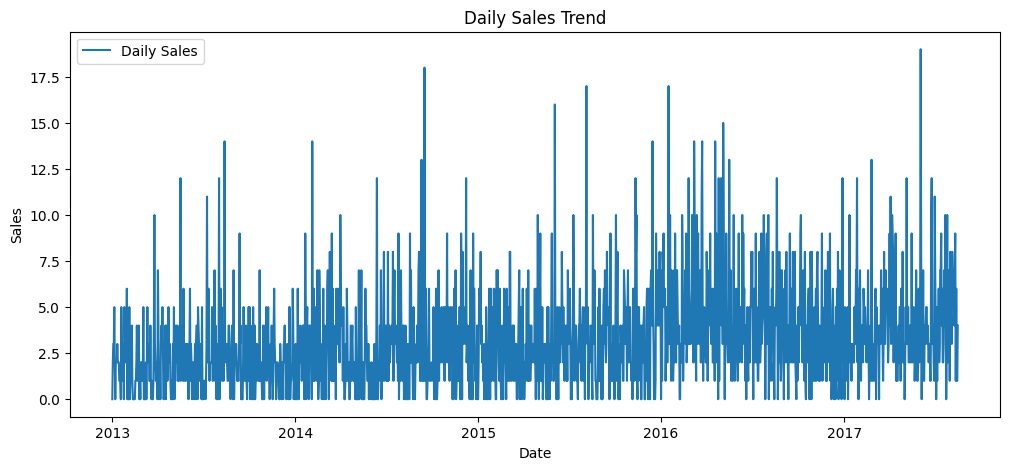

In [7]:
plt.figure(figsize=(12,5))
plt.plot(ts_df, label="Daily Sales")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [8]:
print("Minimum sales:", ts_df["sales"].min())
print("Maximum sales:", ts_df["sales"].max())
print("Average sales:", ts_df["sales"].mean())


Minimum sales: 0.0
Maximum sales: 19.0
Average sales: 3.251187648456057
